# Data Processing for Winner Predictor of ATP Matches

### Process
1. Load Data
2. Clean Data
3. Feature Engineering
4. Load Clean Data to SQLite

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

Using TensorFlow backend.


## Load Dataset

First load all .csv files into an array of datasets.

In [124]:
# Load all tables
datasets = []

datasets.append(pd.read_csv('Men/2018.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2017.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2016.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2015.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2014.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2013.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2012.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2011.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2010.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2009.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2008.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2007.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2006.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2005.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2004.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2003.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2002.csv', parse_dates=[3], encoding='latin1'))
datasets.append(pd.read_csv('Men/2001.csv', parse_dates=[3], encoding='latin1'))

Then use `pd.concat` to merge all datasets into one big dataset.

Use the `keys` argument to index each loaded .csv for its year, for convenience.

In [125]:
# Merge all datasets into one big dataset
data = pd.concat(datasets, keys=['18', '17', '16', '15', '14', '13', 
                                 '12', '11', '10', '09', '08', '07', 
                                 '06', '05', '04', '03', '02', '01'], sort=False)
data.head()

ATP  Location              Tournament       Date  Series    Court  \
18 0    1  Brisbane  Brisbane International 2017-12-31  ATP250  Outdoor   
   1    1  Brisbane  Brisbane International 2017-12-31  ATP250  Outdoor   
   2    1  Brisbane  Brisbane International 2018-01-01  ATP250  Outdoor   
   3    1  Brisbane  Brisbane International 2018-01-01  ATP250  Outdoor   
   4    1  Brisbane  Brisbane International 2018-01-01  ATP250  Outdoor   

     Surface      Round  Best of         Winner ... CBW  CBL IWW  IWL  SBW  \
18 0    Hard  1st Round        3  Dolgopolov O. ... NaN  NaN NaN  NaN  NaN   
   1    Hard  1st Round        3   De Minaur A. ... NaN  NaN NaN  NaN  NaN   
   2    Hard  1st Round        3    Harrison R. ... NaN  NaN NaN  NaN  NaN   
   3    Hard  1st Round        3       Ebden M. ... NaN  NaN NaN  NaN  NaN   
   4    Hard  1st Round        3      Zverev M. ... NaN  NaN NaN  NaN  NaN   

      SBL  B&WW B&WL GBW GBL  
18 0  NaN   NaN  NaN NaN NaN  
   1  NaN   NaN  NaN NaN NaN  
   2  NaN   NaN  NaN NaN NaN  
   3  NaN   NaN  NaN NaN NaN  
   4  NaN   NaN  NaN NaN NaN  

[5 rows x 54 columns]

In [126]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48354 entries, (18, 0) to (01, 2962)
Data columns (total 54 columns):
ATP           48354 non-null int64
Location      48354 non-null object
Tournament    48354 non-null object
Date          48354 non-null datetime64[ns]
Series        48354 non-null object
Court         48354 non-null object
Surface       48354 non-null object
Round         48354 non-null object
Best of       48354 non-null int64
Winner        48354 non-null object
Loser         48354 non-null object
WRank         48339 non-null float64
LRank         48276 non-null object
WPts          35113 non-null float64
LPts          35054 non-null float64
W1            48114 non-null float64
L1            48116 non-null float64
W2            47629 non-null object
L2            47630 non-null object
W3            22367 non-null object
L3            22366 non-null object
W4            4399 non-null float64
L4            4399 non-null float64
W5            1682 non-null float64
L5   

## Inspect Categorial Features

Start by inspecting the categorical features to look for any anomalies.

In [127]:
# Describe the categorical features
data.describe(include=['O'])

,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,LRank,W2,L2,W3,L3,Lsets,Comment
count,48354,48354,48354,48354,48354,48354,48354,48354,48276.0,47629.0,47630.0,22367.0,22366.0,48138.0,48354
unique,109,201,8,2,4,8,889,1405,1405.0,17.0,17.0,17.0,17.0,7.0,5
top,Paris,Australian Open,ATP250,Outdoor,Hard,1st Round,Federer R.,Lopez F.,45.0,6.0,6.0,6.0,4.0,0.0,Completed
freq,3085,2286,10999,39815,25360,22348,1071,408,353.0,27510.0,10218.0,13066.0,4416.0,28426.0,46544


Some columns have been wrongly casted as `object` instead of `float64` or `int64`.

Let's start checking the problem with the columns with few uniques.

In [128]:
# Display the unique values of column L2
data.L2.unique()

array([6.0, 4.0, 2.0, 5.0, 3.0, 0.0, 7.0, 1.0, nan, '7', '3', '4', '2',
       '6', '1', '0', '5', ' '], dtype=object)

Some entries in the `L2` column have the value `' '`, which cannot be casted as float. Thus, the entire column is casted as an object.

Let's fix this by changing these `' '` entries to `NaN`:

In [129]:
# Assign NaN to all entries in L3 equal to ' '
data.loc[data.L2 == ' ', ['L2']] = np.nan
data.L2.unique()

array([6.0, 4.0, 2.0, 5.0, 3.0, 0.0, 7.0, 1.0, nan, '7', '3', '4', '2',
       '6', '1', '0', '5'], dtype=object)

The exact same problem is present in the `L3`, `W2`, and `W3` columns.

In [130]:
print('L3 uniques before fixing: ', data.L3.unique())
print('W2 uniques before fixing: ', data.W2.unique())
print('W3 uniques before fixing: ', data.W3.unique())
data.loc[data.L3 == ' ', ['L3']] = np.nan
data.loc[data.W2 == ' ', ['W2']] = np.nan
data.loc[data.W3 == ' ', ['W3']] = np.nan
print("-" * 40)
print('L3 uniques after fixing: ', data.L3.unique())
print('W2 uniques after fixing: ', data.W2.unique())
print('W3 uniques after fixing: ', data.W3.unique())

L3 uniques before fixing:  [nan 2.0 4.0 3.0 0.0 6.0 5.0 1.0 7.0 '4' '1' '2' '3' '6' '5' '0' '7' ' ']
W2 uniques before fixing:  [7.0 6.0 3.0 5.0 4.0 nan 1.0 2.0 0.0 '6' '3' '7' '4' '0' '2' '1' '5' ' ']
W3 uniques before fixing:  [nan 6.0 7.0 3.0 5.0 4.0 2.0 1.0 0.0 '6' '7' '1' '4' '3' '5' '2' ' ' '0']
----------------------------------------
L3 uniques after fixing:  [nan 2.0 4.0 3.0 0.0 6.0 5.0 1.0 7.0 '4' '1' '2' '3' '6' '5' '0' '7']
W2 uniques after fixing:  [7.0 6.0 3.0 5.0 4.0 nan 1.0 2.0 0.0 '6' '3' '7' '4' '0' '2' '1' '5']
W3 uniques after fixing:  [nan 6.0 7.0 3.0 5.0 4.0 2.0 1.0 0.0 '6' '7' '1' '4' '3' '5' '2' '0']


The `Lsets` column has a typo, which is fixed the same way.

In [131]:
print("Lsets uniques before fixing:", data.Lsets.unique())
data.loc[data.Lsets == '`1', ['Lsets']] = 1 
print("-" * 40)
print("Lsets uniques after fixing:", data.Lsets.unique())

Lsets uniques before fixing: [0.0 1.0 nan 2.0 '1' '0' '2' '`1']
----------------------------------------
Lsets uniques after fixing: [0.0 1.0 nan 2.0 '1' '0' '2']


Now the `LRank` column. This is trickier as it has 1405 unique values, so I can't just print them and look for the typo.

So, Let's write a function to check if a value cannot be converted to `float`. Apply this function to every entry in the `LRank` column, use the results to filter through the column, and get the faulty entries.

In [132]:
# Function to check if a value can be converted to float.
def isnotfloat(value):
  try:
    float(value)
    return False
  except ValueError:
    return True

In [133]:
data.LRank[list(map(lambda x: isnotfloat(x), data.LRank))]

03  816     NR
02  72      NR
    381     NR
    851     NR
    1370    NR
    1488    NR
    1492    NR
    2185    NR
01  577     NR
    588     NR
    1494    NR
    2472    NR
    2524    NR
    2528    NR
    2531    NR
    2535    NR
    2565    NR
Name: LRank, dtype: object

Now that the faulty entry is known, let's do the exact same thing as with the other columns.

In [134]:
data.loc[data.LRank == 'NR', ['LRank']] = np.nan

Now that all faulty entries have been taken care of, let's cast these wrongly objected columns to `float64`. 

In [135]:
# Cast numeric features incorrectly set as 'object' to 'float64'
wrongly_objected = ['L2', 'L3', 'LRank', 'Lsets', 'W2', 'W3']
for w in wrongly_objected:
    data.loc[:, [w]] = np.float64(data[w][:])

data.describe(include=['O'])

,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,Comment
count,48354,48354,48354,48354,48354,48354,48354,48354,48354
unique,109,201,8,2,4,8,889,1405,5
top,Paris,Australian Open,ATP250,Outdoor,Hard,1st Round,Federer R.,Lopez F.,Completed
freq,3085,2286,10999,39815,25360,22348,1071,408,46544


## Handle Missing Data, Drop Features and Create New Ones

How many missing values does each feature have?

In [136]:
# Print in ascending order the amount of missing values for each column with missing values
def print_missing():
    # Create dictionary of missing values
    missing = {}
    for c in data.columns:
        m = sum(data[c].isna())
        if m > 0:
            missing[c] = m

    # Sort dictionary by value and print
    for key, value in sorted(missing.items(), key=lambda x: x[1]):
        print("%s: %s" % (key, value))
        
print_missing()

WRank: 15
LRank: 95
Wsets: 215
Lsets: 216
L1: 238
W1: 240
L2: 726
W2: 727
B365L: 5665
B365W: 5688
EXL: 9913
EXW: 9918
PSW: 11988
PSL: 11988
WPts: 13241
LPts: 13300
LBL: 20999
LBW: 21010
W3: 26086
L3: 26086
MaxW: 26589
MaxL: 26589
AvgW: 26589
AvgL: 26589
CBW: 30848
CBL: 30848
SJL: 32775
SJW: 32782
IWW: 34996
IWL: 34996
UBW: 37683
UBL: 37683
SBW: 42930
SBL: 42930
GBW: 43299
GBL: 43299
W4: 43955
L4: 43955
W5: 46672
L5: 46672
B&WW: 47257
B&WL: 47257


#### Observations:
1. The amount of rows with missing values in any of `WRank`, `LRank`, `Wsets`, `Lsets`, `L1`, `W1`, `L2` and `W2` are few in comparison with the dataset size, and there is no easy way to infer their data so it might be best to drop them.
2. There are A LOT of missing betting odds values.
3. Almost half the dataset does not contain the values for `AvgW`, `AvgL`, `MaxW` and `MaxL`. This values can be calculated so it's not a big problem.
5. Almost the entire dataset has no values for `W4`, `L4`, `W5` and `L5`. This is due to most games being a Best of 3, thus, not needing 4 or 5 rounds.
6. About half the entries do not have the values for `W3` and `L3`. This is due to games being decided in the first 2 rounds.
7. `WPts` and `LPts` can be inferred by interpolation.

First, the entries with missing values in `WRank`, `LRank`, `Wsets`, `Lsets`, `L1`, `W1`, `L2` or `W2` are dropped as they are of no use and don't represent a great loss.

In [137]:
# Drop entries with missing values in WRank, LRank, Wsets, Lsets, L1, W1, L2 or W2
print('Data entries before dropping:', data.shape[0])
data.dropna(subset=['WRank', 'LRank', 'Wsets', 'Lsets', 'L1', 'W1', 'L2', 'W2'], axis=0, inplace=True)
print("-" * 40)
print('Data entries after dropping:', data.shape[0])

Data entries before dropping: 48354
----------------------------------------
Data entries after dropping: 47517


Next in line are the betting odds. There are A LOT of missing values for these, so using the individual odd values may not be a good idea.

What will be done instead, is to use all the available betting odds to obtain new metrics like the standard deviation, the minimum odds value, and the already in-place average and maximum odds value, and drop the individual odd features.

The available individual betting values will also be used to fill the missing `MaxW`, `MaxL`, `AvgW` and `AvgL` values.

In [138]:
# Create a list of all Betting Odds for winner and loser
odds_W = ['B365W', 'EXW', 'PSW', 'LBW', 'CBW', 'SJW', 'IWW', 'UBW', 'SBW', 'GBW', 'B&WW']
odds_L = ['B365L', 'EXL', 'PSL', 'LBL', 'CBL', 'SJL', 'IWL', 'UBL', 'SBL', 'GBL', 'B&WL']

But first, let's drop all entries with no more than 2 individual betting values. This is because we need at least 2 individual values to obtain a standard deviation.

In [139]:
print('Data entries befor dropping:', data.shape[0])
data.dropna(subset=odds_W, thresh=2, axis=0, inplace=True)
data.dropna(subset=odds_L, thresh=2, axis=0, inplace=True)
print("-" * 40)
print('Data entries after dropping:', data.shape[0])

Data entries befor dropping: 47517
----------------------------------------
Data entries after dropping: 46369


Let's fill the missing average and max values with the remaining betting values.

In [140]:
# Fill missing values for AvgW and AvgL with the average of their individual betting odds
print("Missing values for AvgW before filling:",sum(data['AvgW'].isna()))
print("Missing values for AvgL before filling:",sum(data['AvgL'].isna()))
data['AvgW'].fillna(data[odds_W].mean(axis=1), inplace=True)
data['AvgL'].fillna(data[odds_L].mean(axis=1), inplace=True)
print("-" * 40)
print("Missing values for AvgW after filling:", sum(data['AvgW'].isna()))
print("Missing values for AvgL after filling:",sum(data['AvgL'].isna()))
print('\n')

# Fill missing values MaxW and MaxL with the maximum of their individual betting odds
print("Missing values for MaxW before filling:",sum(data['MaxW'].isna()))
print("Missing values for MaxL before filling:",sum(data['MaxL'].isna()))
data['MaxW'].fillna(data[odds_W].max(axis=1), inplace=True)
data['MaxL'].fillna(data[odds_L].max(axis=1), inplace=True)
print("-" * 40)
print("Missing values for MaxW after filling:", sum(data['MaxW'].isna()))
print("Missing values for MaxL after filling:",sum(data['MaxL'].isna()))

Missing values for AvgW before filling: 25049
Missing values for AvgL before filling: 25049
----------------------------------------
Missing values for AvgW after filling: 0
Missing values for AvgL after filling: 0


Missing values for MaxW before filling: 25049
Missing values for MaxL before filling: 25049
----------------------------------------
Missing values for MaxW after filling: 0
Missing values for MaxL after filling: 0


Now, let's create the `StdW` and `StdL` features for the standard deviation in betting for winner and loser.

In [141]:
# Create StdW and StdL
data['StdW'] = data[odds_W].std(axis=1)
data['StdL'] = data[odds_L].std(axis=1)
display(data.StdW.head())
display(data.StdL.head())

18  0    0.059722
    1    0.188149
    2    0.029439
    3    0.067823
    4    0.072572
Name: StdW, dtype: float64

18  0    0.041633
    1    0.025000
    2    0.086603
    3    0.060553
    4    0.278867
Name: StdL, dtype: float64

Now the `MinW` and `MinL` features for the minimum betting odd values.

In [142]:
# Create MinW and MinL
data['MinW'] = data[odds_W].min(axis=1)
data['MinL'] = data[odds_L].min(axis=1)
display(data.MinW.head())
display(data.MinL.head())

18  0    2.10
    1    2.75
    2    1.61
    3    2.35
    4    1.40
Name: MinW, dtype: float64

18  0    1.61
    1    1.38
    2    2.15
    3    1.50
    4    2.37
Name: MinL, dtype: float64

Once the the values for minimum, maximum, average and standard deviation have all been obtained, it is time time to drop all the individual betting values.

In [143]:
print(data.columns.values)
print('-'*40)
# Drop all winner individual betting values
data.drop(odds_W, axis=1, inplace=True)
# Drop all loser individual betting values
data.drop(odds_L, axis=1, inplace=True)
print(data.columns.values)

['ATP' 'Location' 'Tournament' 'Date' 'Series' 'Court' 'Surface' 'Round'
 'Best of' 'Winner' 'Loser' 'WRank' 'LRank' 'WPts' 'LPts' 'W1' 'L1' 'W2'
 'L2' 'W3' 'L3' 'W4' 'L4' 'W5' 'L5' 'Wsets' 'Lsets' 'Comment' 'B365W'
 'B365L' 'EXW' 'EXL' 'LBW' 'LBL' 'PSW' 'PSL' 'MaxW' 'MaxL' 'AvgW' 'AvgL'
 'SJW' 'SJL' 'UBW' 'UBL' 'CBW' 'CBL' 'IWW' 'IWL' 'SBW' 'SBL' 'B&WW' 'B&WL'
 'GBW' 'GBL' 'StdW' 'StdL' 'MinW' 'MinL']
----------------------------------------
['ATP' 'Location' 'Tournament' 'Date' 'Series' 'Court' 'Surface' 'Round'
 'Best of' 'Winner' 'Loser' 'WRank' 'LRank' 'WPts' 'LPts' 'W1' 'L1' 'W2'
 'L2' 'W3' 'L3' 'W4' 'L4' 'W5' 'L5' 'Wsets' 'Lsets' 'Comment' 'MaxW'
 'MaxL' 'AvgW' 'AvgL' 'StdW' 'StdL' 'MinW' 'MinL']


To take care of the missing values for the features `W3`, `L3`, `W4`, `L4`, `W5` and `L5`; let's create two new features called `Matchpoints` and `SetsWon`.

* `Matchpoints` - Total amount of points won by the player through the match.
* `PctSetsWon` - Percentage of sets won from total number of sets played.

In [144]:
# Sum all W1-W5 horizontally and create new feature WMatchpoints
data['WMatchpoints'] = data.loc[:, ['W1', 'W2', 'W3', 'W4', 'W5']].sum(axis=1)
# Sum all L1-L5 horizontally and create new feature LMatchpoints
data['LMatchpoints'] = data.loc[:, ['L1', 'L2', 'L3', 'L4', 'L5']].sum(axis=1)
# Divide Wsets over the sum of Wsets and Lsets to get the sets winrate
data['WSetsWinrate'] = data.loc[:, ['Wsets']].squeeze() / data.loc[:, ['Wsets', 'Lsets']].sum(axis=1)
data['LSetsWinrate'] = data.loc[:, ['Lsets']].squeeze() / data.loc[:, ['Wsets', 'Lsets']].sum(axis=1)
# Drop the features W1-W5, L1-L5, Wsets and Lsets
data.drop(['W1', 'W2', 'W3', 'W4', 'W5', 'L1', 'L2', 'L3', 'L4', 'L5', 'Wsets', 'Lsets'], axis=1, inplace=True)

data.loc[:, ['Best of', 'WMatchpoints', 'LMatchpoints', 'WSetsWinrate', 'LSetsWinrate']]


Best of  WMatchpoints  LMatchpoints  WSetsWinrate  LSetsWinrate
18 0           3          13.0          10.0      1.000000      0.000000
   1           3          13.0          10.0      1.000000      0.000000
   2           3          15.0          12.0      0.666667      0.333333
   3           3          12.0           5.0      1.000000      0.000000
   4           3          13.0           9.0      1.000000      0.000000
   5           3          12.0           7.0      1.000000      0.000000
   6           3          12.0           6.0      1.000000      0.000000
   7           3          12.0           7.0      1.000000      0.000000
   8           3          13.0           9.0      1.000000      0.000000
   9           3          19.0          17.0      0.666667      0.333333
   10          3          18.0          12.0      0.666667      0.333333
   11          3          13.0           6.0      1.000000      0.000000
   12          3          12.0           3.0      1.000000      0.000000
   13          3          19.0          15.0      0.666667      0.333333
   14          3          17.0          13.0      0.666667      0.333333
   15          3          12.0           8.0      1.000000      0.000000
   16          3          13.0           8.0      1.000000      0.000000
   17          3          18.0          13.0      0.666667      0.333333
   18          3          18.0          17.0      0.666667      0.333333
   19          3          17.0          15.0      0.666667      0.333333
   20          3          12.0           4.0      1.000000      0.000000
   21          3          13.0          13.0      0.666667      0.333333
   22          3          11.0           8.0      1.000000      0.000000
   23          3          18.0          14.0      0.666667      0.333333
   24          3          17.0          16.0      0.666667      0.333333
   25          3          15.0          11.0      0.666667      0.333333
   26          3          12.0           6.0      1.000000      0.000000
   28          3          16.0          10.0      0.666667      0.333333
   29          3          13.0           9.0      1.000000      0.000000
   30          3          12.0           7.0      1.000000      0.000000
...          ...           ...           ...           ...           ...
01 2931        3          17.0          14.0      0.666667      0.333333
   2932        3          16.0          16.0      0.666667      0.333333
   2933        3          16.0          11.0      0.666667      0.333333
   2934        3          15.0           6.0      0.666667      0.333333
   2935        3          13.0           6.0      1.000000      0.000000
   2936        3          12.0           6.0      1.000000      0.000000
   2937        3          12.0           7.0      1.000000      0.000000
   2938        3          13.0           9.0      1.000000      0.000000
   2939        3          16.0          14.0      0.666667      0.333333
   2940        3          12.0           8.0      1.000000      0.000000
   2941        3          12.0           4.0      1.000000      0.000000
   2942        3          16.0          10.0      0.666667      0.333333
   2943        3          12.0           6.0      1.000000      0.000000
   2944        3          16.0          18.0      0.666667      0.333333
   2945        3          13.0           9.0      1.000000      0.000000
   2946        3          13.0           7.0      1.000000      0.000000
   2947        5          25.0          18.0      0.750000      0.250000
   2948        3          12.0           6.0      1.000000      0.000000
   2949        3          14.0          12.0      1.000000      0.000000
   2950        3          13.0           8.0      1.000000      0.000000
   2952        3          13.0           9.0      1.000000      0.000000
   2953        3          12.0           7.0      1.000000      0.000000
   2954        3          15.0          11.0      0.666667      0.3

And finally, let's take care of the `WPts` and `LPts` features.

My common sense tells me there is a direct correlation between Rank and Point, which would mean the Pts features are not needed since there is not much variance between them.

To confirm this hypothesis, let's do a simple scatter plot where the X axis is the Rank and the Y axis are the Points.

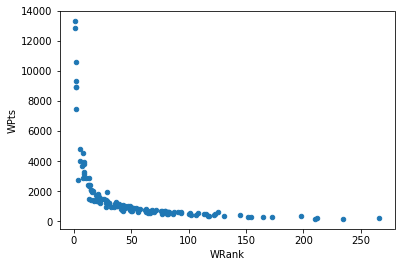

In [145]:
import random
# Get a random sample of 200 entries from the dataset.
sample = data.iloc[list(random.sample(range(data.shape[0]), 200)), :]
# Simple scatter plot
sample.plot.scatter(x='WRank', y='WPts')

Just as suspected, the Points and the Rank form a very pretty quadratic function.

But just to double check, let's see the difference between the percentage of winners with a better rank than their opponents and the percentage of winners with more points than their opponents.

In [146]:
# Total amount of matches
n_matches = data.shape[0]

### What percentage of winners had a better rank than the loser?
# Amount of winners with better rank
n_better_rank_winners = sum(data.dropna(subset=['WPts', 'LPts'], axis=0).WRank < data.dropna(subset=['WPts', 'LPts'], axis=0).LRank)
# Percentage of winners with better rank
pct_better_rank_winners = n_better_rank_winners / n_matches

print('Winners with better rank: %f (%s)' % (pct_better_rank_winners*100, n_better_rank_winners))

### What percentage of winners had more points than the losers?
# Amount of winners with more points
n_more_points_winners = sum(data.dropna(subset=['WPts', 'LPts'], axis=0).WPts > data.dropna(subset=['WPts', 'LPts'], axis=0).LPts)
# Percentage of winners with more points
pct_more_points_winners = n_more_points_winners / n_matches

print('Winners with more points: %f (%s)' % (pct_more_points_winners*100, n_more_points_winners))

n_diff = np.abs(n_better_rank_winners - n_more_points_winners)
pct_diff = np.abs(pct_better_rank_winners - pct_more_points_winners)
print('Difference: %f (%s)' % (pct_diff*100, n_diff))

Winners with better rank: 49.045699 (22742)
Winners with more points: 49.015506 (22728)
Difference: 0.030193 (14)


Only 14 cases where the winner had a better rank but not a better score. So according to the fundamentals of Principal Component Analysis, there will be no problem for dropping them.

In [147]:
print(data.columns.values)
data.drop(['WPts', 'LPts'], axis=1, inplace=True)

print('-'*40)
print(data.columns.values)

['ATP' 'Location' 'Tournament' 'Date' 'Series' 'Court' 'Surface' 'Round'
 'Best of' 'Winner' 'Loser' 'WRank' 'LRank' 'WPts' 'LPts' 'Comment' 'MaxW'
 'MaxL' 'AvgW' 'AvgL' 'StdW' 'StdL' 'MinW' 'MinL' 'WMatchpoints'
 'LMatchpoints' 'WSetsWinrate' 'LSetsWinrate']
----------------------------------------
['ATP' 'Location' 'Tournament' 'Date' 'Series' 'Court' 'Surface' 'Round'
 'Best of' 'Winner' 'Loser' 'WRank' 'LRank' 'Comment' 'MaxW' 'MaxL' 'AvgW'
 'AvgL' 'StdW' 'StdL' 'MinW' 'MinL' 'WMatchpoints' 'LMatchpoints'
 'WSetsWinrate' 'LSetsWinrate']


## Convert Categorical Features to Numerical

Once again, let's inspect the categorical features to come up with ways to numericalize them.

In [148]:
data.describe(include=['O'])

,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,Comment
count,46369,46369,46369,46369,46369,46369,46369,46369,46369
unique,109,200,8,2,4,8,852,1305,4
top,Paris,Wimbledon,ATP250,Outdoor,Hard,1st Round,Federer R.,Lopez F.,Completed
freq,3016,2257,10737,38148,24303,21187,1042,402,45299


#### Observations:
1. There are fewer winners than losers.
2. All other features seem easy enough.

The convertion is done by creating a dictionary for each feature where the key is the current feature's value and the dictionary's value is a discrete number; and mapping the dictionaries to the features.

In [149]:
### First the Winner/Loser features as they share the same mapping
# Create players dictionary
players_map = {}

# Fill dictionary
val = 0
for row in data.Winner.unique():
    players_map[row] = val
    val += 1
for row in data.Loser.unique():
    if not row in players_map:
        players_map[row] = val
        val += 1

# Map dictionary to features
data['WinnerID'] = data.Winner.map(players_map)
data['LoserID'] = data.Loser.map(players_map)

### Then the rest of the object features
# Create dictionaries
location_map = {}
tournament_map = {}
series_map = {}
court_map = {}
surface_map = {}
round_map = {}
comment_map = {}
# Create array of dictionaries for easier iteration
maps = [location_map, tournament_map, series_map, court_map, surface_map, 
        round_map, comment_map]

# Number iterator
it = 0
# Iterate over the categorical features
for c in data.select_dtypes(include=object):
    val = 0
    # Iterate over the unique values of the current feature
    for u in data[c].unique():
        maps[it][u] = val
        val += 1
    # Map dictionary to feature
    data[c] = data[c].map(maps[it])
    it += 1

data.head()

ATP  Location  Tournament       Date  Series  Court  Surface  Round  \
18 0    1         0           0 2017-12-31       0      0        0      0   
   1    1         0           0 2017-12-31       0      0        0      0   
   2    1         0           0 2018-01-01       0      0        0      0   
   3    1         0           0 2018-01-01       0      0        0      0   
   4    1         0           0 2018-01-01       0      0        0      0   

      Best of  Winner      ...       AvgW  AvgL      StdW      StdL  MinW  \
18 0        3       0      ...       2.17  1.68  0.059722  0.041633  2.10   
   1        3       1      ...       2.96  1.39  0.188149  0.025000  2.75   
   2        3       2      ...       1.67  2.17  0.029439  0.086603  1.61   
   3        3       3      ...       2.37  1.58  0.067823  0.060553  2.35   
   4        3       4      ...       1.44  2.73  0.072572  0.278867  1.40   

      MinL  WMatchpoints  LMatchpoints  WSetsWinrate  LSetsWinrate  
18 0  1.61          13.0          10.0      1.000000      0.000000  
   1  1.38          13.0          10.0      1.000000      0.000000  
   2  2.15          15.0          12.0      0.666667      0.333333  
   3  1.50          12.0           5.0      1.000000      0.000000  
   4  2.37          13.0           9.0      1.000000      0.000000  

[5 rows x 26 columns]

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46369 entries, (18, 0) to (01, 2962)
Data columns (total 26 columns):
ATP             46369 non-null int64
Location        46369 non-null int64
Tournament      46369 non-null int64
Date            46369 non-null datetime64[ns]
Series          46369 non-null int64
Court           46369 non-null int64
Surface         46369 non-null int64
Round           46369 non-null int64
Best of         46369 non-null int64
Winner          46369 non-null int64
Loser           46369 non-null int64
WRank           46369 non-null float64
LRank           46369 non-null float64
Comment         46369 non-null int64
MaxW            46369 non-null float64
MaxL            46369 non-null float64
AvgW            46369 non-null float64
AvgL            46369 non-null float64
StdW            46369 non-null float64
StdL            46369 non-null float64
MinW            46369 non-null float64
MinL            46369 non-null float64
WMatchpoints    46369 non-null float6

## Map Date Feature to DaysSinceGame0

The Date as a datetime object is of no use, so instead I'll replace it with the difference in days between the entry's date and the earliest date recorded in the dataset.

In [151]:
# Get the earliest date entry
basedate = data.Date.sort_values()[0]
# Map date to days_since_game0
data['DaysSinceGame0'] = list(map(lambda d: (d - basedate).days, data.Date))
# Drop Date feature
data.drop(['Date'], axis=1, inplace=True)

data.head()

ATP  Location  Tournament  Series  Court  Surface  Round  Best of  \
18 0    1         0           0       0      0        0      0        3   
   1    1         0           0       0      0        0      0        3   
   2    1         0           0       0      0        0      0        3   
   3    1         0           0       0      0        0      0        3   
   4    1         0           0       0      0        0      0        3   

      Winner  Loser       ...        AvgL      StdW      StdL  MinW  MinL  \
18 0       0     65       ...        1.68  0.059722  0.041633  2.10  1.61   
   1       1    126       ...        1.39  0.188149  0.025000  2.75  1.38   
   2       2     57       ...        2.17  0.029439  0.086603  1.61  2.15   
   3       3    113       ...        1.58  0.067823  0.060553  2.35  1.50   
   4       4    264       ...        2.73  0.072572  0.278867  1.40  2.37   

      WMatchpoints  LMatchpoints  WSetsWinrate  LSetsWinrate  DaysSinceGame0  
18 0          13.0          10.0      1.000000      0.000000            6208  
   1          13.0          10.0      1.000000      0.000000            6208  
   2          15.0          12.0      0.666667      0.333333            6209  
   3          12.0           5.0      1.000000      0.000000            6209  
   4          13.0           9.0      1.000000      0.000000            6209  

[5 rows x 26 columns]

## Migrate to SQLite

### Create The DBs and the Tables

In [159]:
import sqlite3

# In order to make any operation with the database we need 
# to get a cursor object and pass the SQL statements to the
# cursor object to execute them. Finally it is necessary 
# to commit the changes.
def create_normdb():
    # Create db file and open connection
    db = sqlite3.connect('db/men_norm')
    print("men_norm db created.")
    # Get a cursor object
    cursor = db.cursor()
    # Create players table
    cursor.execute('''
        CREATE TABLE players(
            id INTEGER PRIMARY KEY, 
            name TEXT
        )
    ''')
    print("players table created.")
    # Create matches table
    cursor.execute('''
        CREATE TABLE matches(
            id INTEGER PRIMARY KEY ASC, 
            days_since_game0 INTEGER,
            atp INTEGER, 
            location INTEGER, 
            tournament INTEGER, 
            series INTEGER,
            court INTEGER, 
            surface INTEGER, 
            round INTEGER, 
            bestof INTEGER, 
            player1_id INTEGER, 
            player2_id INTEGER,
            comment INTEGER, 
            winner INTEGER,
            FOREIGN KEY(player1_id) REFERENCES players(id),
            FOREIGN KEY(player2_id) REFERENCES players(id)
        )
    ''')
    print("matches table created")
    # Create match_player_stats table
    cursor.execute('''
        CREATE TABLE match_player_stats(
            id INTEGER PRIMARY KEY ASC, 
            match_id INTEGER,
            player_id INTEGER, 
            rank INTEGER, 
            matchpoints INTEGER,
            setswinrate REAL, 
            won INTEGER,
            FOREIGN KEY(match_id) REFERENCES matches(id),
            FOREIGN KEY(player_id) REFERENCES players(id)
        )
    ''')
    print("match_player_stats table created.")
    # Create match_player_odds table
    cursor.execute('''
        CREATE TABLE match_player_odds(
            id INTEGER PRIMARY KEY ASC, 
            match_id INTEGER,
            player_id INTEGER, 
            max REAL, 
            min REAL, 
            avg REAL, 
            std REAL,
            FOREIGN KEY(match_id) REFERENCES matches(id),
            FOREIGN KEY(player_id) REFERENCES players(id)
        )
    ''')
    print("match_player_odds table created.")
    # Commit changes
    db.commit()
    # Close connection to db
    db.close()
    
def create_denormdb():
    # Create db file and open connection
    db = sqlite3.connect('db/men_denorm')
    print("men_denorm db created.")
    # Get a cursor object
    cursor = db.cursor()
    # Create players table
    cursor.execute('''
        CREATE TABLE players(
            id INTEGER PRIMARY KEY,
            name TEXT
        )
    ''')
    print("players table created.")
    # Create matches table
    cursor.execute('''
        CREATE TABLE matches(
            id INTEGER PRIMARY KEY ASC, 
            days_since_game0 INTEGER,
            atp INTEGER, 
            location INTEGER, 
            tournament INTEGER,
            series INTEGER,
            court INTEGER, 
            surface INTEGER, 
            round INTEGER, 
            bestof INTEGER,
            player1_id INTEGER, 
            player2_id INTEGER,
            player1_rank INTEGER, 
            player2_rank INTEGER, 
            player1_maxodds REAL,
            player2_maxodds REAL, 
            player1_minodds REAL, 
            player2_minodds REAL,
            player1_avgodds, 
            player2_avgodds, 
            player1_stdodds REAL,
            player2_stdodds REAL, 
            player1_lastgame_days_since_game0 INTEGER,
            player1_lastgame_atp INTEGER, 
            player1_lastgame_location INTEGER,
            player1_lastgame_tournament INTEGER, 
            player1_lastgame_series INTEGER,
            player1_lastgame_court INTEGER, 
            player1_lastgame_surface INTEGER,
            player1_lastgame_round INTEGER, 
            player1_lastgame_bestof INTEGER, 
            player1_lastgame_matchpoints INTEGER, 
            player1_lastgame_setswinrate REAL,
            player1_lastgame_player_rank INTEGER, 
            player1_lastgame_opponent_rank INTEGER,
            player1_lastgame_player_maxodds REAL, 
            player1_lastgame_opponent_maxodds REAL, 
            player1_lastgame_player_minodds REAL, 
            player1_lastgame_opponent_minodds REAL, 
            player1_lastgame_player_avgodds REAL, 
            player1_lastgame_opponent_avgodds REAL, 
            player1_lastgame_player_stdodds REAL, 
            player1_lastgame_opponent_stdodds REAL, 
            player1_lastgame_won INTEGER, 
            player2_lastgame_days_since_game0 INTEGER, 
            player2_lastgame_atp INTEGER, 
            player2_lastgame_location INTEGER, 
            player2_lastgame_tournament INTEGER, 
            player2_lastgame_series INTEGER, 
            player2_lastgame_court INTEGER, 
            player2_lastgame_surface INTEGER, 
            player2_lastgame_round INTEGER, 
            player2_lastgame_bestof INTEGER, 
            player2_lastgame_matchpoints INTEGER, 
            player2_lastgame_setswinrate REAL,
            player2_lastgame_player_rank INTEGER, 
            player2_lastgame_opponent_rank INTEGER, 
            player2_lastgame_player_maxodds REAL, 
            player2_lastgame_opponent_maxodds REAL,
            player2_lastgame_player_minodds REAL, 
            player2_lastgame_opponent_minodds REAL, 
            player2_lastgame_player_avgodds REAL, 
            player2_lastgame_opponent_avgodds REAL, 
            player2_lastgame_player_stdodds REAL, 
            player2_lastgame_opponent_stdodds REAL, 
            player2_lastgame_won INTEGER,
            FOREIGN KEY(player1_id) REFERENCES players(id),
            FOREIGN KEY(player2_id) REFERENCES players(id)
        )    
    ''')
    print("matches table created.")
    # Commit changes
    db.commit()
    # Close connection to db
    db.close()

In [160]:
create_normdb()
create_denormdb()

men_norm db created.
players table created.
matches table created
match_player_stats table created.
match_player_odds table created.
men_denorm db created.
players table created.
matches table created.


### Define the Classes needed

In [ ]:
class Player:
    id: 

## Cast all Valus to float64
This is done for easier interface with TensorFlow, and to avoid problems when normalizing.

In [30]:
data[:] = np.float64(data[:])

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46369 entries, (18, 0) to (01, 2962)
Data columns (total 34 columns):
ATP               46369 non-null float64
Location          46369 non-null float64
Tournament        46369 non-null float64
Series            46369 non-null float64
Court             46369 non-null float64
Surface           46369 non-null float64
Round             46369 non-null float64
Best of           46369 non-null float64
Winner            46369 non-null float64
Loser             46369 non-null float64
WRank             46369 non-null float64
LRank             46369 non-null float64
W1                46369 non-null float64
L1                46369 non-null float64
W2                46369 non-null float64
L2                46369 non-null float64
W3                46369 non-null float64
L3                46369 non-null float64
W4                46369 non-null float64
L4                46369 non-null float64
W5                46369 non-null float64
L5                4

## Normalization

Let's normalize the features to void any wacky optimization search spaces and make it possible for our algorithm to actually find the minimum.

In [170]:
# Create dictionaries for storaging means and standard devs.
means = {}
std = {}

# Iterate over each feature
for c in data.columns:
    # Get the mean
    means[c] = data[c].mean()
    # Get the standard deviation
    std[c] = data[c].std()
    # Apply normalization
    data[c] = (data[c] - means[c]) / std[c]

           ATP  Location  Tournament    Series     Court   Surface     Round  \
18 0 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   1 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   2 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   3 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   4 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   

       Best of    Winner     Loser    ...        Lsets   Comment      MaxW  \
18 0 -0.485874 -1.233700 -1.229997    ...    -0.736944 -0.153325  0.254208   
   1 -0.485874 -1.228993 -1.227076    ...    -0.736944 -0.153325  0.959001   
   2 -0.485874 -1.224285 -1.224155    ...     1.046158 -0.153325 -0.142237   
   3 -0.485874 -1.219578 -1.221233    ...    -0.736944 -0.153325  0.423065   
   4 -0.485874 -1.214871 -1.218312    ...    -0.736944 -0.153325 -0.274386   

          MaxL      AvgW      AvgL      StdW      

In [172]:
data.head()

ATP  Location  Tournament    Series     Court   Surface     Round  \
18 0 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   1 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   2 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   3 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   
   4 -1.778512 -1.546541   -1.347191 -1.177326 -0.464218 -0.813433 -0.738292   

       Best of    Winner     Loser    ...        Lsets   Comment      MaxW  \
18 0 -0.485874 -1.233700 -1.229997    ...    -0.736944 -0.153325  0.254208   
   1 -0.485874 -1.228993 -1.227076    ...    -0.736944 -0.153325  0.959001   
   2 -0.485874 -1.224285 -1.224155    ...     1.046158 -0.153325 -0.142237   
   3 -0.485874 -1.219578 -1.221233    ...    -0.736944 -0.153325  0.423065   
   4 -0.485874 -1.214871 -1.218312    ...    -0.736944 -0.153325 -0.274386   

          MaxL      AvgW      AvgL      StdW      StdL      MinW      MinL  
18 0 -0.015058  0.368910 -0.564794 -0.139740 -0.278068  0.475745 -0.642511  
   1 -0.016244  1.172207 -0.662267  0.436439 -0.289291  1.267355 -0.753870  
   2 -0.012973 -0.139506 -0.400099 -0.275600 -0.247727 -0.121007 -0.381061  
   3 -0.015489  0.572276 -0.598406 -0.103392 -0.265303  0.780210 -0.695770  
   4 -0.010637 -0.373378 -0.211876 -0.082089 -0.118002 -0.376758 -0.274544  

[5 rows x 33 columns]

## Split Data into Training Set, Dev Set and Test Set
There are 46k entries...

Let's use 80% for the training set, 10% for the dev set and 10% for the test set.

In [177]:
# Shuffle the data set
shuffled = data.sample(frac=1)


,,ATP,Location,Tournament,Series,Court,Surface,Round,Best of,Winner,Loser,...,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,StdW,StdL,MinW,MinL
06,542,-0.996231,-1.109529,-1.128376,1.290697,2.154115,-0.813433,-0.738292,-0.485874,-1.021871,0.578387,...,-0.736944,-0.153325,-0.472609,-0.006504,-0.556408,0.167932,-0.255534,-0.116216,-0.595973,0.224149
02,1216,-0.158073,2.346839,1.775895,0.879360,-0.464218,0.430034,-0.738292,-0.485874,1.025811,0.122639,...,1.046158,-0.153325,-0.384510,-0.011536,-0.441167,-0.244367,-0.226360,-0.221259,-0.437651,-0.211602
06,2464,1.182980,1.592000,0.582359,0.879360,2.154115,-0.813433,-0.134286,-0.485874,-1.214871,0.633894,...,-0.736944,-0.153325,0.312941,-0.015184,0.486862,-0.587314,-0.177597,-0.254907,0.658424,-0.681245
09,2522,1.462366,-0.314962,1.079665,-1.177326,2.154115,-0.813433,-0.738292,-0.485874,0.588031,0.806261,...,-0.736944,-0.153325,-0.582732,-0.001652,-0.681885,0.631767,-0.355011,-0.136805,-0.717759,0.998818
10,2329,1.182980,0.757704,-0.113871,-0.354652,-0.464218,-0.813433,1.677733,-0.485874,-0.828871,-0.949537,...,-0.736944,-0.153325,-0.472609,-0.005246,-0.566576,0.154487,-0.347485,-0.163140,-0.559437,0.393608


## Train Neural Network with Keras+TensorFlow

In [1]:
data.head()

NameError: name 'data' is not defined

# TODO:
1. Divide dataset into X and Y.
2. Create player class with info from last 3 matches(?) - NO, too many players with 3 games or less (~33%)
3. Maybe from last match.